### Rolling predictions 

Comparing results on scikit tree & forest, prophet, SARIMA and craft on energy time series

We start by feeding the model 2 months of data, and ask them to predict 1 week

In [2]:
import pandas as pd
import numpy as np
import subprocess
import json
import ampds_benchmark_tools as abt
import pickle
import os
import matplotlib.pyplot as plt

In [47]:
import imp
imp.reload(abt)
os.getcwd()

'C:\\Users\\Claire\\Documents\\craft-ai-kit-energy\\benchmark'

In [3]:
import logging
import warnings
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [4]:
data = pd.read_csv('data/ampds_power_30T.csv')
data.index = pd.to_datetime(data.date, unit="s")
data = data.dropna().drop('date',1)
#Adding temperature information
temp = pd.read_csv('data/ampds_temp_30T.csv', parse_dates=['date'])
temp.index = pd.to_datetime(temp.date, unit='s')
temp = temp.drop('date',1)
data = data.merge(temp, left_index=True, right_index=True)
data.index.freq = '30T'

In [5]:
data.index.values[0], data.index.values[-1]

(numpy.datetime64('2012-04-01T07:00:00.000000000'),
 numpy.datetime64('2014-04-01T06:30:00.000000000'))

In [6]:
data.head()

,load,temp
date,,
2012-04-01 07:00:00,1947.400000,4.7
2012-04-01 07:30:00,1269.766667,4.7
2012-04-01 08:00:00,1645.300000,5.3
2012-04-01 08:30:00,845.666667,5.3
2012-04-01 09:00:00,1584.966667,5.9


In [7]:
print('{} semaines dans les données'.format(round((data.index[-1] - data.index[0]).days/7,2)))

104.14 semaines dans les données


Craft ai predictions for week n° 9, depth 3


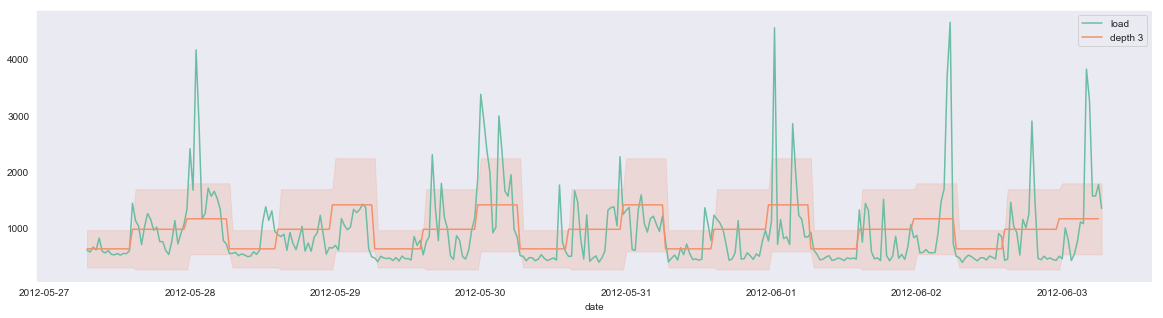

Craft ai predictions for week n° 9, depth 5


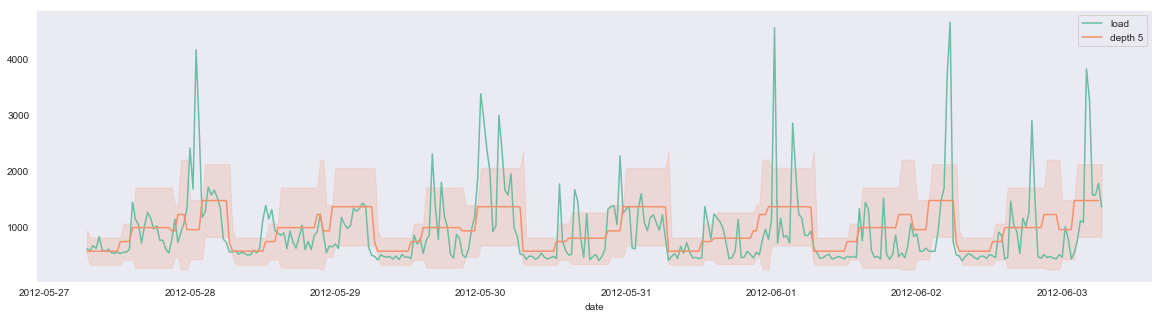

Craft ai predictions for week n° 9, depth 7


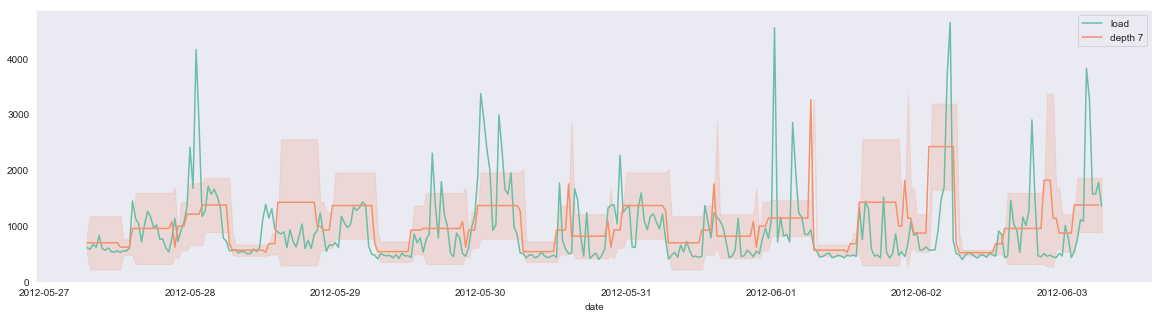

Craft ai predictions for week n° 9, depth 9


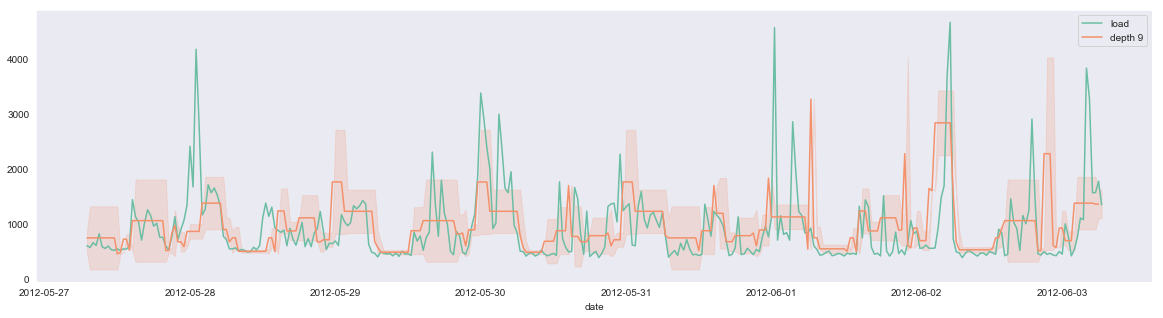

Model predictions for week n° 9


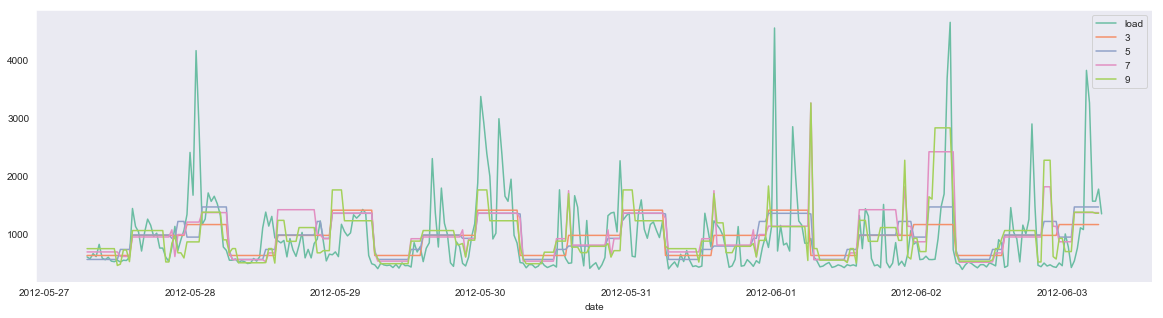

   ids    mae   mape   rmse        r2  week
0    3  388.0  46.58  592.0  0.187837     9
1    5  377.0  44.87  589.0  0.195453     9
2    7  418.0  52.52  648.0  0.026250     9
3    9  398.0  47.63  637.0  0.061334     9
   ids    mae   mape   rmse        r2  week
0    3  467.0  50.78  704.0  0.098464    10
1    5  494.0  53.38  739.0  0.008667    10
2    7  554.0  58.94  849.0 -0.308524    10
3    9  583.0  59.21  887.0 -0.429790    10
   ids    mae   mape   rmse        r2  week
0    3  447.0  77.12  530.0 -0.831918    11
1    5  435.0  74.06  519.0 -0.753197    11
2    7  449.0  76.04  544.0 -0.924876    11
3    9  449.0  74.66  582.0 -1.204564    11
   ids    mae   mape   rmse        r2  week
0    3  415.0  50.69  629.0  0.078609    12
1    5  414.0  47.53  651.0  0.010959    12
2    7  409.0  44.99  668.0 -0.039936    12
3    9  429.0  47.17  680.0 -0.078377    12
   ids    mae   mape   rmse        r2  week
0    3  402.0  37.39  723.0  0.138297    13
1    5  387.0  34.46  702.0  0.1

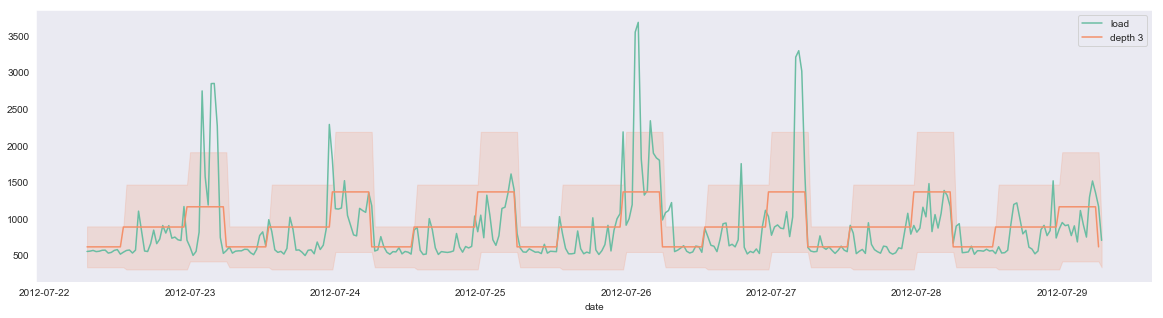

Craft ai predictions for week n° 17, depth 5


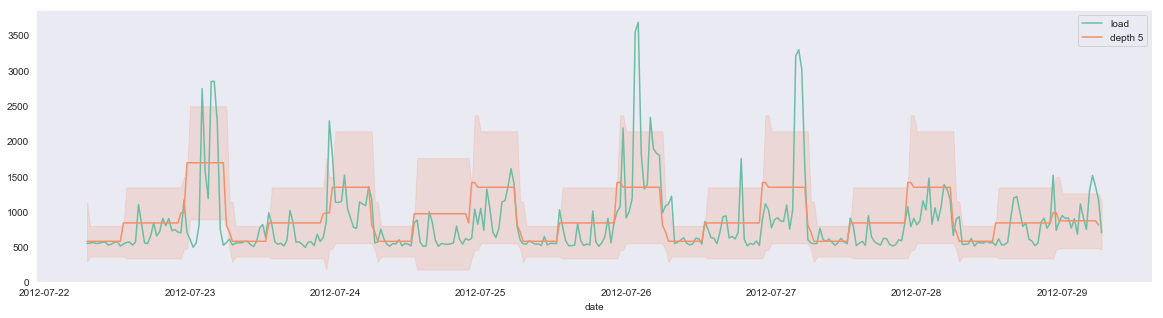

Craft ai predictions for week n° 17, depth 7


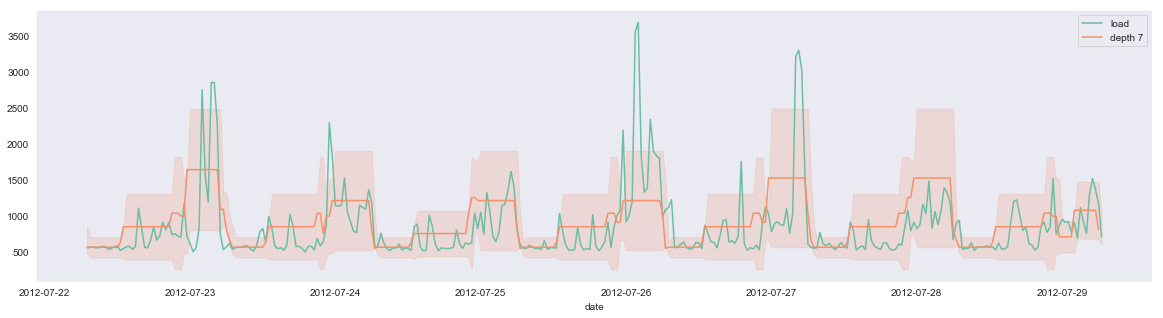

Craft ai predictions for week n° 17, depth 9


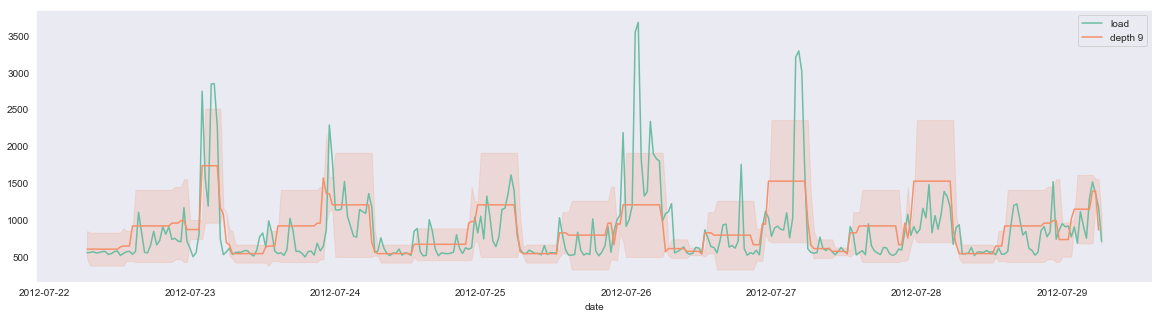

Model predictions for week n° 17


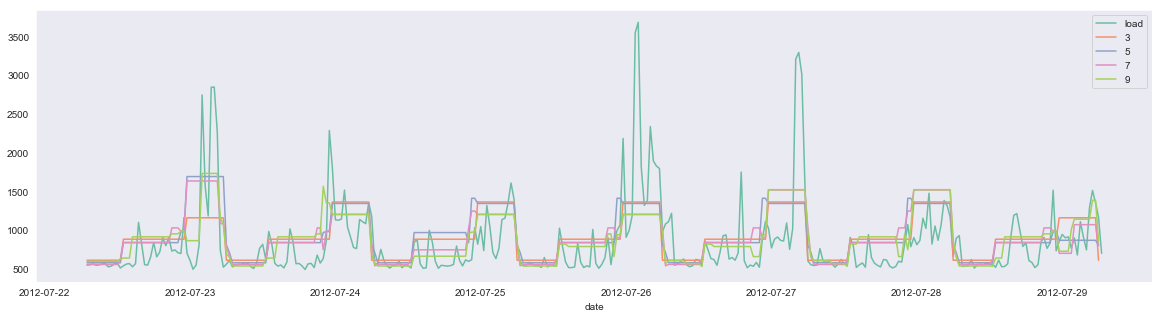

   ids    mae   mape   rmse        r2  week
0    3  276.0  32.79  425.0  0.245332    17
1    5  275.0  33.22  425.0  0.247950    17
2    7  269.0  31.74  422.0  0.257301    17
3    9  253.0  28.88  409.0  0.303763    17
   ids    mae   mape   rmse        r2  week
0    3  324.0  31.31  604.0  0.152219    18
1    5  316.0  29.54  609.0  0.137624    18
2    7  341.0  32.88  661.0 -0.016969    18
3    9  365.0  36.48  683.0 -0.085833    18
   ids    mae   mape   rmse        r2  week
0    3  290.0  29.16  425.0  0.352255    19
1    5  381.0  44.62  508.0  0.072540    19
2    7  365.0  41.86  562.0 -0.133241    19
3    9  399.0  45.11  631.0 -0.428515    19
   ids    mae   mape   rmse        r2  week
0    3  420.0  31.05  723.0  0.160100    20
1    5  455.0  37.32  737.0  0.129059    20
2    7  441.0  32.12  755.0  0.084919    20
3    9  451.0  33.24  747.0  0.103567    20
   ids    mae   mape   rmse        r2  week
0    3  296.0  31.64  459.0  0.275695    21
1    5  278.0  28.13  454.0  0.2

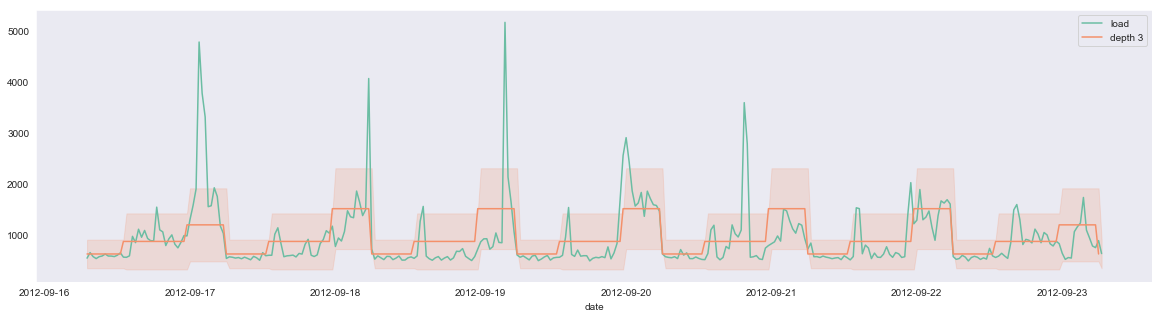

Craft ai predictions for week n° 25, depth 5


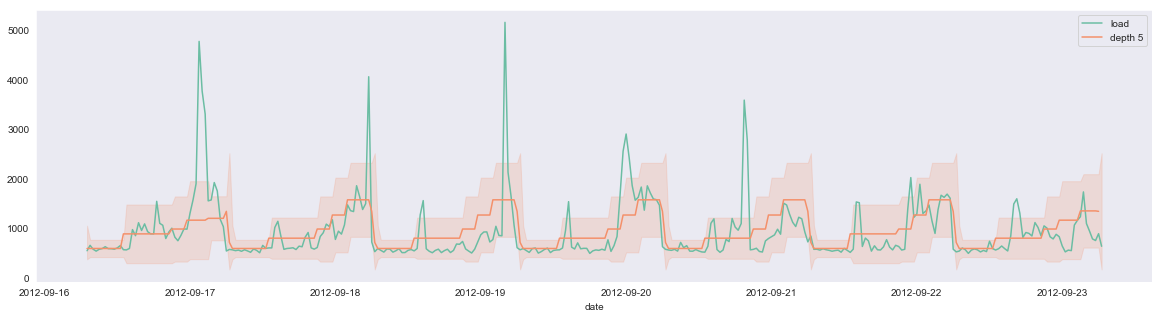

Craft ai predictions for week n° 25, depth 7


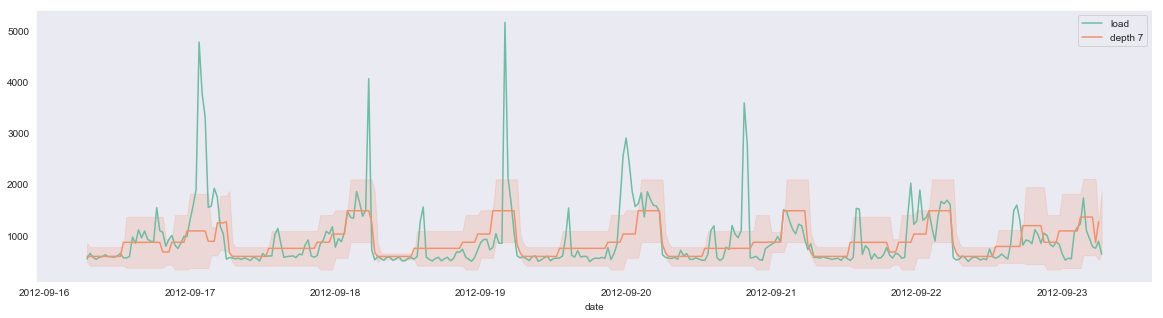

Craft ai predictions for week n° 25, depth 9


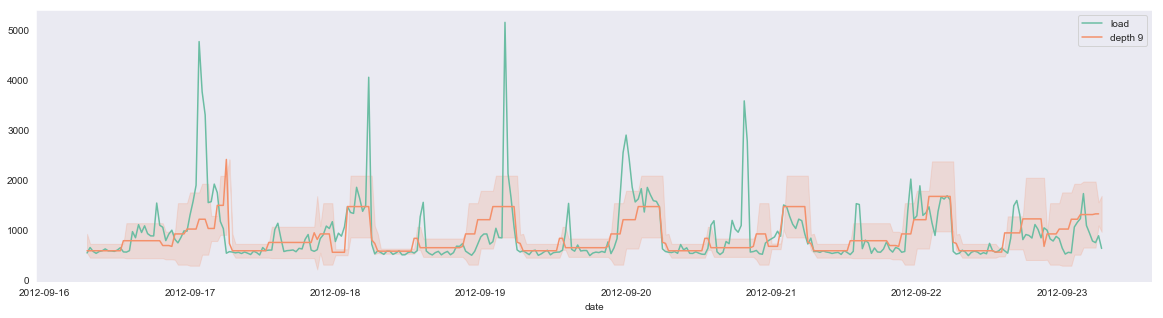

Model predictions for week n° 25


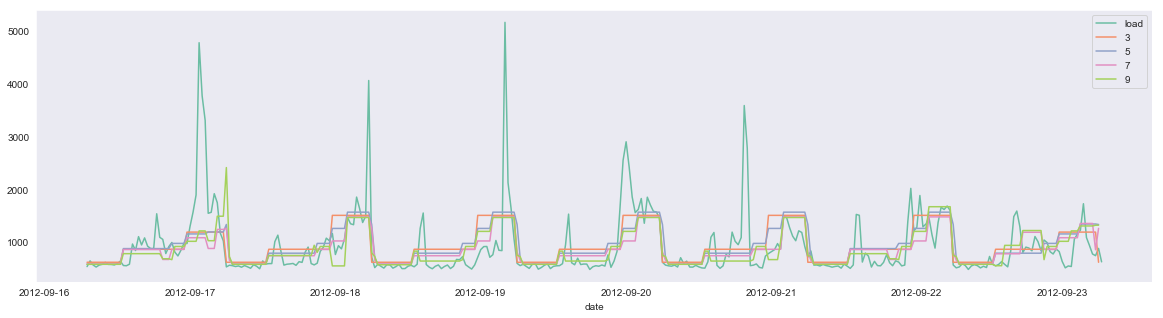

   ids    mae   mape   rmse        r2  week
0    3  292.0  30.83  523.0  0.259728    25
1    5  297.0  31.22  534.0  0.230182    25
2    7  282.0  27.13  538.0  0.217592    25
3    9  283.0  27.00  544.0  0.199944    25
   ids    mae   mape   rmse        r2  week
0    3  296.0  32.62  522.0  0.191027    26
1    5  299.0  32.42  520.0  0.196775    26
2    7  376.0  45.04  611.0 -0.110441    26
3    9  381.0  44.73  741.0 -0.629766    26
   ids    mae   mape   rmse        r2  week
0    3  420.0  51.37  606.0  0.094604    27
1    5  413.0  49.76  598.0  0.116601    27
2    7  428.0  51.31  634.0  0.008697    27
3    9  418.0  48.77  639.0 -0.008170    27
   ids    mae   mape   rmse        r2  week
0    3  407.0  41.91  580.0  0.149069    28
1    5  395.0  35.93  587.0  0.128697    28
2    7  391.0  33.92  606.0  0.071245    28
3    9  410.0  34.95  632.0 -0.012121    28
   ids    mae   mape   rmse        r2  week
0    3  441.0  31.49  776.0  0.070094    29
1    5  455.0  34.39  779.0  0.0

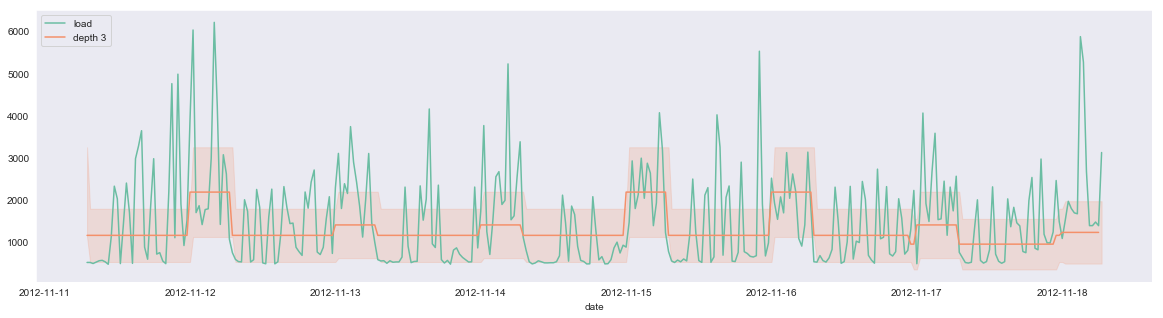

Craft ai predictions for week n° 33, depth 5


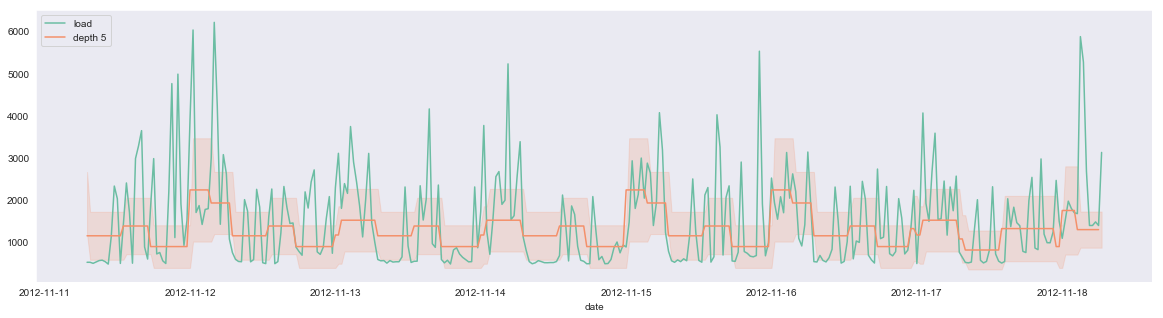

Craft ai predictions for week n° 33, depth 7


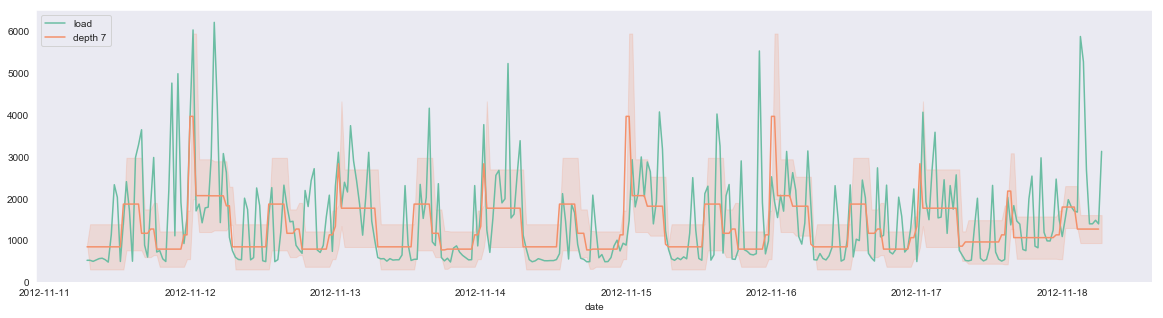

Craft ai predictions for week n° 33, depth 9


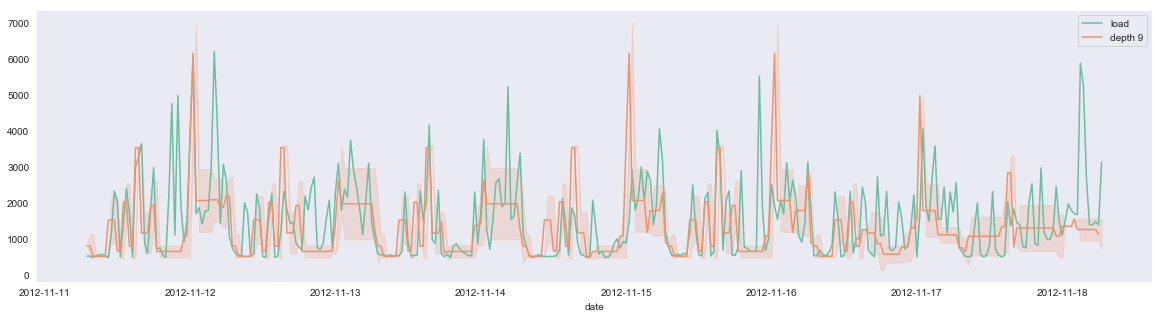

Model predictions for week n° 33


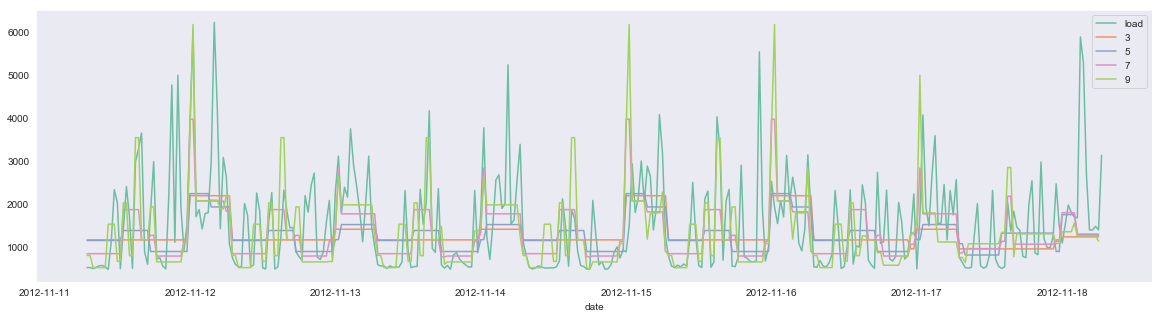

   ids    mae   mape    rmse        r2  week
0    3  773.0  62.33  1056.0  0.060641    33
1    5  740.0  58.34  1053.0  0.066302    33
2    7  702.0  51.32  1033.0  0.100995    33
3    9  752.0  53.68  1146.0 -0.106001    33
   ids    mae   mape    rmse        r2  week
0    3  735.0  60.78   936.0  0.057110    34
1    5  729.0  56.45   982.0 -0.038820    34
2    7  759.0  60.46  1001.0 -0.078455    34
3    9  811.0  62.55  1105.0 -0.314348    34
   ids    mae   mape   rmse        r2  week
0    3  680.0  67.05  824.0  0.040265    35
1    5  682.0  67.10  848.0 -0.017416    35
2    7  687.0  66.20  862.0 -0.051306    35
3    9  693.0  64.84  903.0 -0.153735    35
   ids    mae   mape    rmse        r2  week
0    3  762.0  56.03  1011.0  0.024896    36
1    5  715.0  52.26   959.0  0.121766    36
2    7  718.0  52.51   957.0  0.125825    36
3    9  726.0  53.57   975.0  0.092760    36
   ids    mae   mape   rmse        r2  week
0    3  600.0  68.54  730.0  0.065789    37
1    5  699.0  83

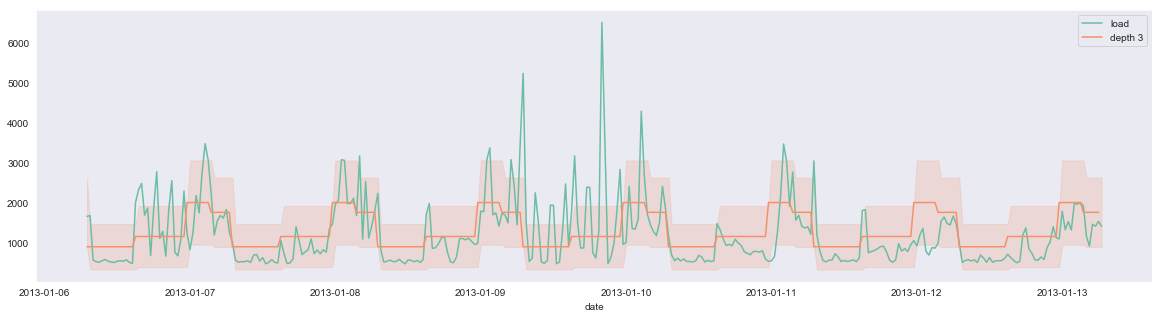

Craft ai predictions for week n° 41, depth 5


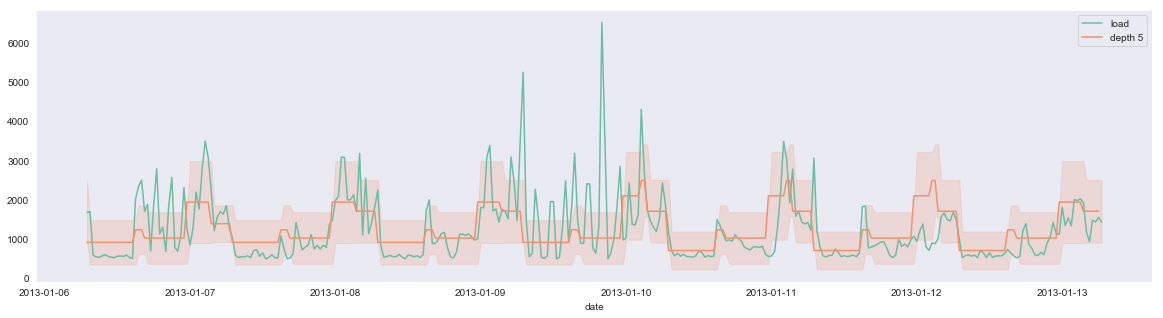

Craft ai predictions for week n° 41, depth 7


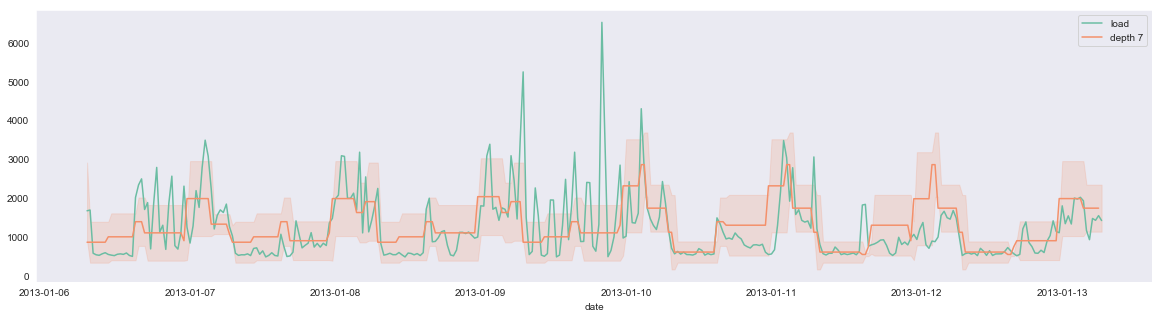

Craft ai predictions for week n° 41, depth 9


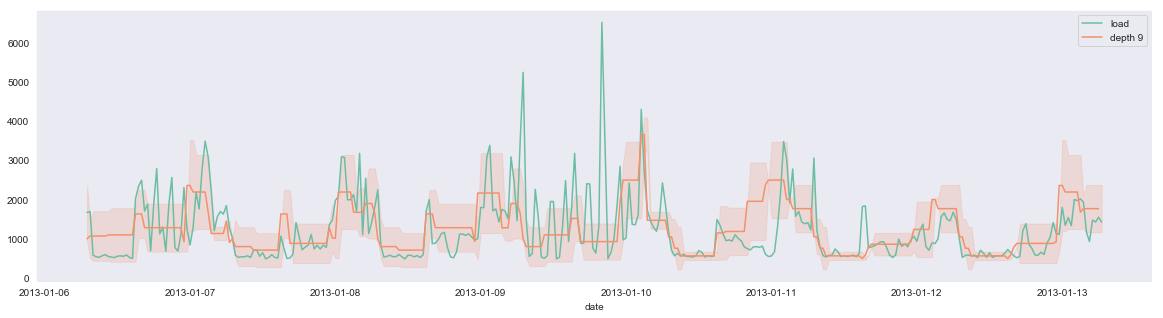

Model predictions for week n° 41


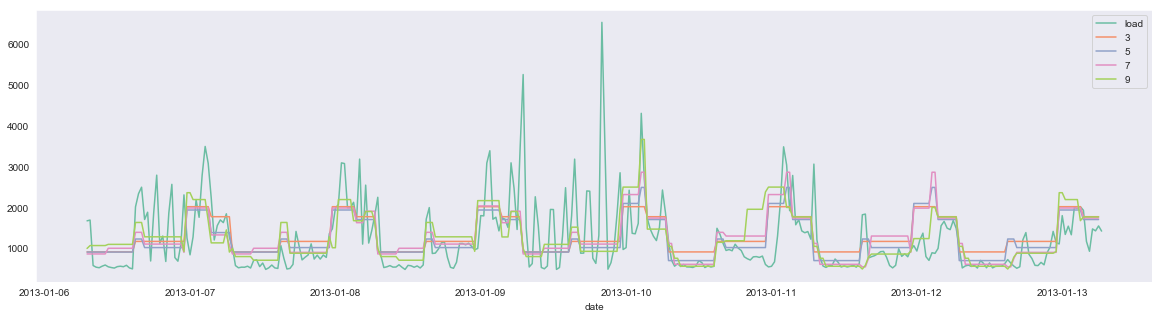

   ids    mae   mape   rmse        r2  week
0    3  492.0  48.21  692.0  0.279063    41
1    5  448.0  40.60  694.0  0.274461    41
2    7  471.0  43.67  705.0  0.251502    41
3    9  474.0  42.73  729.0  0.199616    41
   ids    mae   mape   rmse        r2  week
0    3  448.0  44.18  668.0  0.298155    42
1    5  380.0  30.56  666.0  0.302799    42
2    7  381.0  30.32  681.0  0.270505    42
3    9  438.0  34.32  733.0  0.153582    42
   ids    mae   mape   rmse        r2  week
0    3  547.0  46.02  760.0  0.171245    43
1    5  510.0  39.48  755.0  0.182455    43
2    7  496.0  37.16  748.0  0.198654    43
3    9  523.0  39.05  784.0  0.118848    43
   ids    mae   mape   rmse        r2  week
0    3  555.0  45.63  800.0  0.164338    44
1    5  572.0  49.66  781.0  0.203191    44
2    7  597.0  53.53  813.0  0.138398    44
3    9  636.0  54.93  920.0 -0.103631    44
   ids    mae   mape   rmse        r2  week
0    3  645.0  47.89  921.0  0.123746    45
1    5  653.0  52.12  910.0  0.1

In [ ]:
week_unit = 7*24*2 #nombre de demi-heures dans une semaine
week_index = 8
max_week_index = data.shape[0]/(7*24*2)
# max_week_index = 9
scores = []
depths = [3,5,7,9]

while week_index < max_week_index:
    last_train_index = week_index * week_unit
    last_test_index = (week_index +1) * week_unit
    week_preds = {}
    
    _, data_test = abt.split_data(data, last_train_index , last_test_index)
    
    for depth in depths : 
        node_file = "load_benchmark_ampds_depth"+str(depth)
        craft_preds = abt.get_craft_preds(stop_train=last_train_index, start_pred=last_train_index, stop_pred=last_test_index, node_file = node_file)
        week_preds[str(depth)]=craft_preds
        
    #get prediction values
    crps = [craft_preds['predictedLoad'] for craft_preds in list(week_preds.values())]
    
    #get scores for the current week
    frame = abt.get_models_scores(data_test=data_test.drop('temp',1),
                      predictions=crps, 
                      idx = depths)
    frame['week'] = week_index +1 
    scores.append(frame)
    
    with open('scores_depth.pickle', 'wb') as f:
        # Pickle the score array so that we can retrieve the scores if the prog fails
        pickle.dump(scores, f, pickle.HIGHEST_PROTOCOL)
    
    #once in a while, print our predictions to see how they compare to each other and to the real values
    if (week_index%8 ==0):
        stds = [craft_preds['standardDeviation'] for craft_preds in list(week_preds.values())]
        
        for i,depth in enumerate(depths): 
            crp, std = crps[i], stds[i]
            print("Craft ai predictions for week n° {}, depth {}".format(week_index+1, depth))
            abt.plot_period_predictions(data_test.drop('temp',1), 
                                        predictions = {'depth '+str(depth):crp}, 
                                        standardDev = True,
                                        low_val = crp - std,
                                        upper_val = crp + std)
            plt.show()
        
        print("Model predictions for week n° {}".format(week_index+1))
        crp = craft_preds['predictedLoad']
        std = craft_preds['standardDeviation']
        abt.plot_period_predictions(data_test=data_test.drop('temp',1),
                                    predictions = week_preds)
    #print scores 
    print(frame)
    #update index
    week_index +=1

In [8]:
with open('scores_depth.pickle', 'rb') as f:
    scores = pickle.load(f)

### Scores finaux 

In [9]:
final_table = scores[0]
for score in scores[1:]:
    final_table = pd.concat([final_table, score],0)

In [10]:
final_table = final_table.set_index(['ids', 'week'])

In [11]:
final_table.groupby(by='ids').mean()

,mae,mape,rmse,r2
ids,,,,
3,471.170732,44.999024,694.000000,0.137017
5,473.926829,45.419756,703.341463,0.104376
7,484.365854,46.146098,731.439024,0.013656
9,501.000000,46.630000,770.439024,-0.105239
